In [1]:
import math
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
page_id = "drreborn.com.hk"

path = 'post/'+page_id+'_post.csv'

In [3]:
data = pd.read_csv(path, encoding = 'utf8')

In [4]:
data.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,216259018448153_1779125892161450,新一年新開始😉DR REBORN祝各位新年快樂！\r\n\r\n#HappyNewYear ...,NaN,photo,https://www.facebook.com/216259018448153/posts...,2018-01-01 12:00:00,9,0,0,9,0,0,0,0,0
1,216259018448153_1778766528864053,【小鮮肉變爆肌男神🧑💪】\r\n好多人都想知 關智斌 Kenny Kwan 愈嚟愈Man嘅秘...,MRRM Magazine,link,https://www.facebook.com/216259018448153/posts...,2017-12-28 09:51:19,8,0,0,8,0,0,0,0,0
2,216259018448153_1771386556268717,祝大家聖誕節快樂🌲今日大家諗住去邊度玩？\r\n日日開完通頂Party又係時候約番個Trea...,NaN,photo,https://www.facebook.com/216259018448153/posts...,2017-12-25 11:06:00,0,0,0,0,0,0,0,0,0
3,216259018448153_1771366999604006,祝大家冬至快樂，早啲番屋企同家人食飯🍚\r\n今日全線營業時間至晚上七時，敬請留意！😀,NaN,photo,https://www.facebook.com/216259018448153/posts...,2017-12-22 10:36:04,8,0,1,8,0,0,0,0,0
4,216259018448153_1741359725938067,【DR REBORN 專業美容教室】 JUVÉDERM®透明質酸 打造臉部黃金比例🔻\r\n...,JUVÉDERM®打造臉部黃金比例,video,https://www.facebook.com/216259018448153/posts...,2017-12-01 11:30:00,4,2,1,4,0,0,0,0,0


In [5]:
len(data)

398

In [6]:
data = data[(data['num_reactions']!=0) & (data['status_message'].notnull())].reindex()

In [7]:
len(data)

382

In [8]:
data['datetime'] = data['status_published'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['weekday'] = data['datetime'].apply(lambda x: x.weekday_name)
data['hour'] = data['datetime'].apply(lambda x:  x.hour)

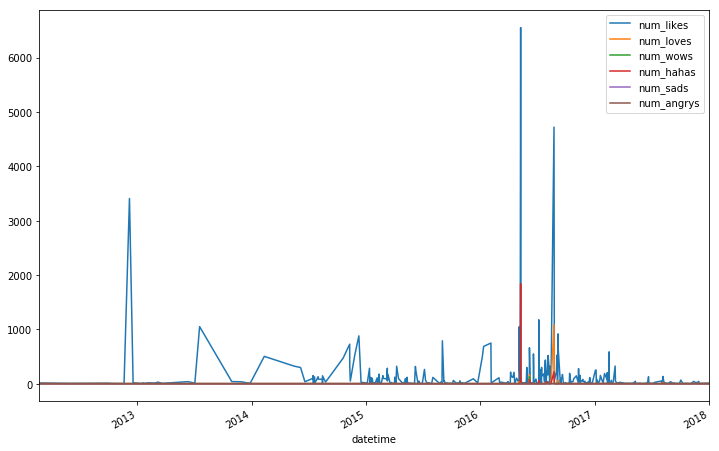

In [9]:
data.plot(x='datetime', y=['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'] ,
       figsize=(12,8))

In [10]:
data[data['num_reactions'] > 2000]

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,datetime,weekday,hour
171,216259018448153_1128317990575580,【身邊總有幾個鍾意一齊扮靚嘅閨蜜...】👭\r\n\r\n由即日起，凡DR REBORN及P...,Timeline Photos,photo,https://www.facebook.com/216259018448153/posts...,2016-08-24 10:51:04,6025,125,75,4720,1079,4,220,2,0,2016-08-24 10:51:04,Wednesday,10
227,216259018448153_1043845449022835,【衫夾可以夾出個高鼻樑？😱】天生鼻扁扁，聽人講用衫夾每日夾下個鼻就可以變高啲！靜靜雞借媽媽既...,Timeline Photos,photo,https://www.facebook.com/216259018448153/posts...,2016-05-09 20:24:09,8496,119,132,6551,52,35,1840,10,7,2016-05-09 20:24:09,Monday,20
387,216259018448153_395345610539492,想肌膚水嫩地伴您渡過寒冬?,DR REBORN 與你,photo,https://www.facebook.com/216259018448153/posts...,2012-12-06 19:18:01,3406,26,20,3406,0,0,0,0,0,2012-12-06 19:18:01,Thursday,19


In [13]:
print(data['status_link'][171])
print(data['status_link'][227])
print(data['status_link'][387])

https://www.facebook.com/216259018448153/posts/1128317990575580
https://www.facebook.com/216259018448153/posts/1043845449022835
https://www.facebook.com/216259018448153/posts/395345610539492


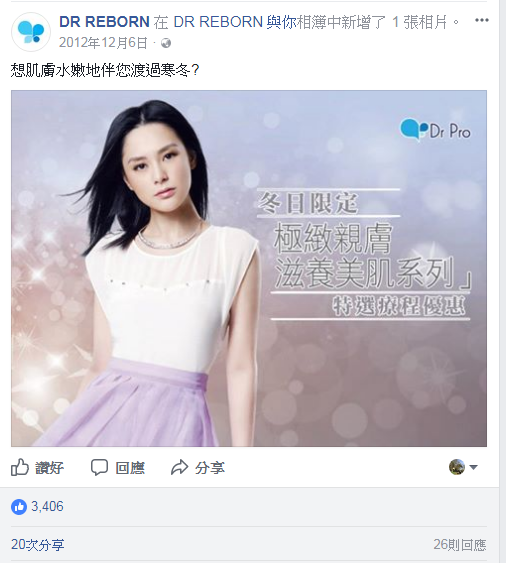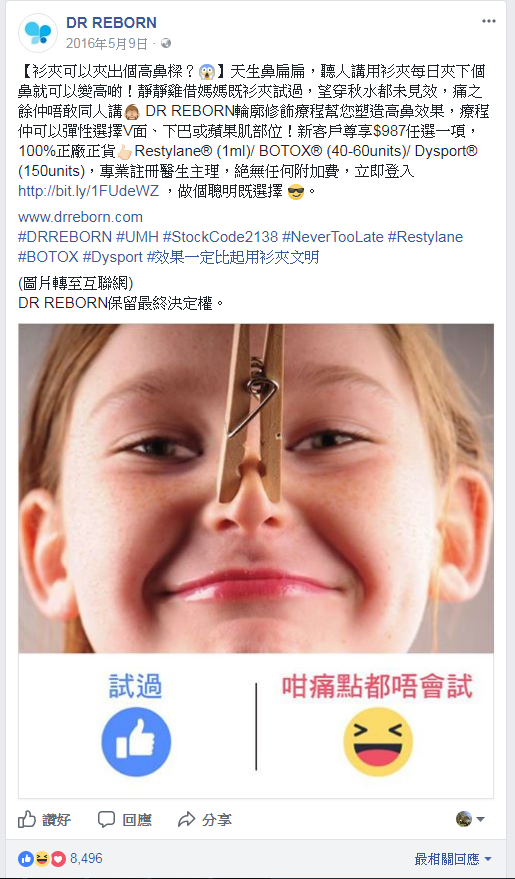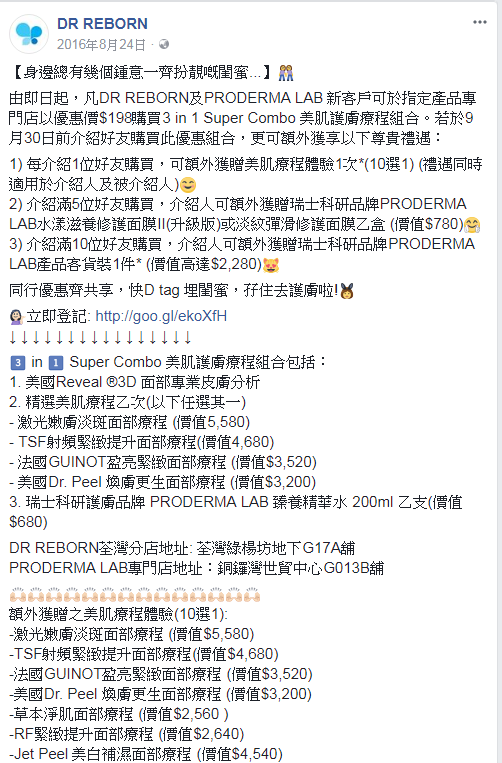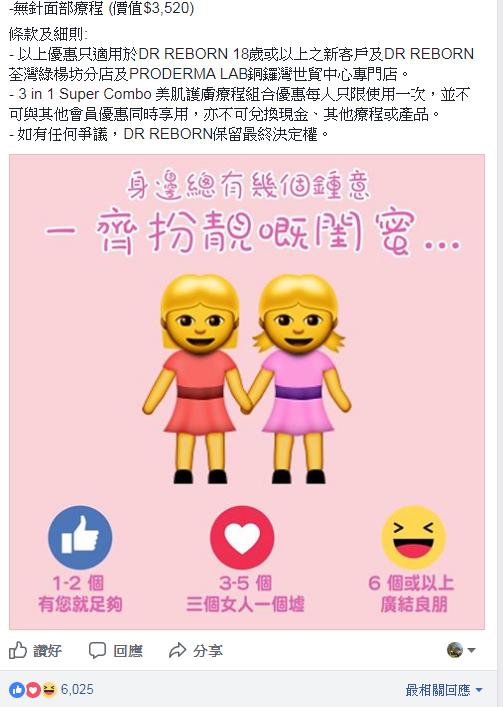

In [14]:
data2 = data.drop([171,227,387])

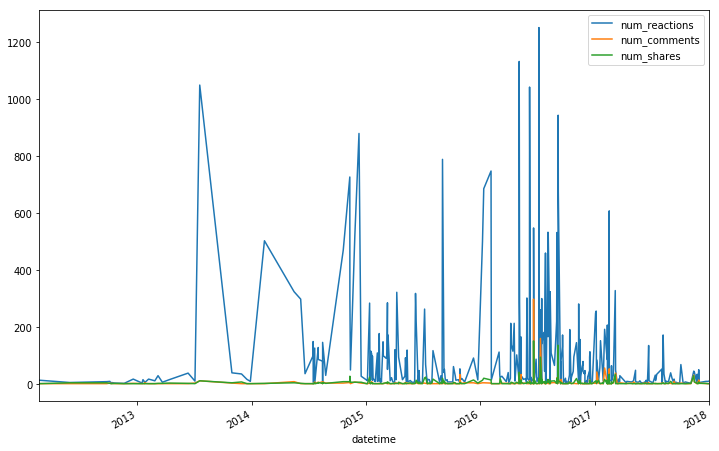

In [15]:
data2.plot(x='datetime', y=['num_reactions', 'num_comments', 'num_shares'],
       figsize=(12,8))

In [16]:
import datetime
delta_datetime = data['datetime'].shift(1) - data['datetime']
delta_datetime_df = pd.Series(delta_datetime).describe().apply(str)
delta_datetime_df = delta_datetime_df.to_frame(name='frequent of posts')

In [17]:
def weekday(d):
    list_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'weekday': list_value}).reset_index()
    return df

In [19]:
df_weekday = weekday(dict(data['weekday'].value_counts()))

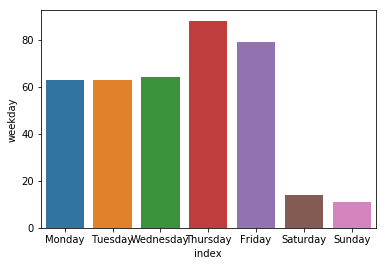

In [20]:
sns.barplot(x='index', y='weekday', data = df_weekday)

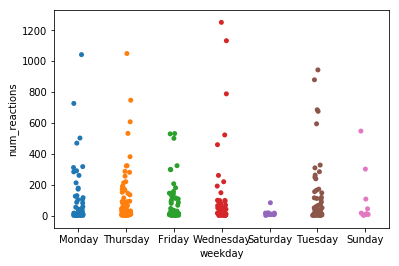

In [21]:
sns.stripplot(x='weekday',y='num_reactions', data = data2, jitter=True)

In [22]:

def hour(d):
    list_key = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    list_value = []
    for one in list_key:
        if one in d.keys():
            list_value.append(d[one])
        else:
            list_value.append(0)
    df = pd.DataFrame(index = list_key, data = {'hour': list_value}).reset_index()
    return df

In [23]:
df_hour = hour(dict(data['hour'].value_counts()))

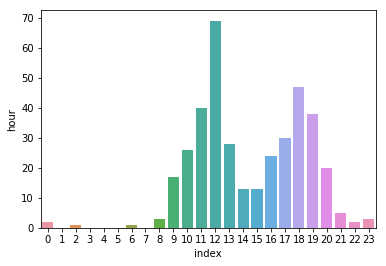

In [24]:
ax = sns.barplot(x='index', y='hour', data = df_hour)

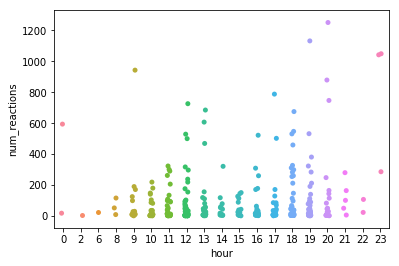

In [25]:
sns.stripplot(x='hour',y='num_reactions', data = data2, jitter=True)

In [27]:
df_status_type = data['status_type'].value_counts().to_frame(name='status_type')

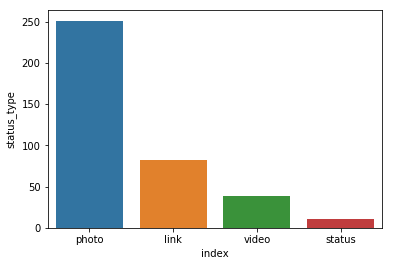

In [28]:
sns.barplot(x='index', y='status_type', data = df_status_type.reset_index())

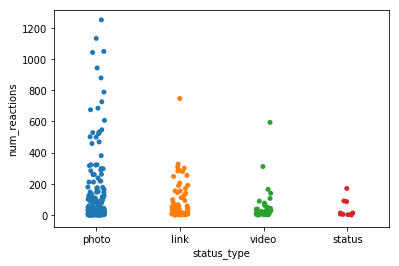

In [29]:
sns.stripplot(x="status_type", y="num_reactions", data=data2, jitter=True)

In [30]:
import jieba
import jieba.analyse
import operator
from wordcloud import WordCloud, STOPWORDS

In [31]:
list(data['status_message'])[324]

'【從此告別美顏相機】\r\n每次影完相，總不忘按 “一鍵美顏” 為相中自己 “喬裝” 一下。一白遮三醜，粉嫩白滑既皮膚絕對係送俾自己最好既禮。DR REBORN 喺GROUPON推出左【激光亮白嫩膚及去斑面部療程】兼送價值 $480 的Biotherm Biosource禮品套裝，即時click入 http://goo.gl/xF7LmD 選購，讓妳真正擁有白滑嫩肌，從此告別美顏神器。'

In [ ]:
for one in jieba.cut(list(data['status_message'])[99]):
    print (one)

In [ ]:
jieba.analyse.extract_tags(list(data['status_message'])[99], topK=20)

In [ ]:
def jieba_extract(message_list):
    word_count = {}
    for message in message_list:
        seg_list = jieba.analyse.extract_tags(message, topK=120)
        for seg in seg_list:
            if not seg in word_count:
                word_count[seg] = 1
            else:
                word_count[seg] += 1

    sorted_word_count = sorted(word_count.items(), key=operator.itemgetter(1))
    #sorted_word_count_dict = dict(sorted_word_count)
    sorted_word_count.reverse()
    return sorted_word_count
sorted_word_count = jieba_extract(list(data['status_message']))

In [ ]:
sorted_word_count_dict = dict(sorted_word_count)

In [ ]:
tpath = 'NotoSansCJKtc-Black.otf'
wc = WordCloud(max_font_size=120, relative_scaling=.1,font_path=tpath,width=900, height=600, stopwords=True).fit_words(sorted_word_count_dict)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 200)
plt.show()